[^ gor: Uvod](00_uvod.ipynb)

# Neenačbe

Podobno kot [enačb](01a_enacbe.ipynb), se tudi **neenačb** lotimo s knjižnico [Sympy](http://www.sympy.org). Bolj konkretno z modulom
[solvers.inequalities](http://docs.sympy.org/dev/modules/solvers/inequalities.html).

In [1]:
import sympy as sym
sym.init_printing() # lepši izpis formul

## Primeri

Reši neenačbo
\begin{equation}
x^2-2\ge x
\end{equation}

Za neenačbe z eno neznanko uporabimo splošno funkcijo `solve_univariate_inequality`, ki prepozna tip neeenačbe in uporabi primerno metodo. Ko definiramo spremenljivko `x`, posebej označimo, da gre za realno število.

In [10]:
from sympy.solvers.inequalities import solve_univariate_inequality
from sympy import Symbol

x = Symbol('x', real=True) #  x simbol, ki je realno število
neenacba = x**2 -2 >= x
solve_univariate_inequality(neenacba,x)

Če želimo rešitev v obliki intervalov, ukazu `solve_univariate_inequality` dodamo parameter `relational=False`.

In [11]:
solve_univariate_inequality(neenacba, x, relational=False) # rešitev neenačbe v obliki intervala

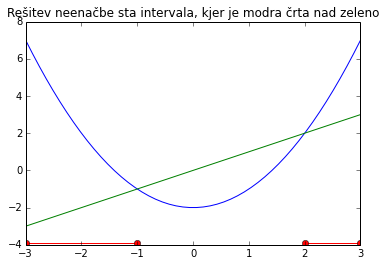

In [57]:
# grafična rešitev
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
t = np.linspace(-3,3) # zaporedje x-ov, v katerih bomo tabelirali funkcijo
leva_f = sym.lambdify(x,neenacba.lhs)
desna_f = sym.lambdify(x,neenacba.rhs)
plt.plot(t,leva_f(t))
plt.plot(t,desna_f(t))
plt.title("Rešitev neenačbe sta intervala, kjer je modra črta nad zeleno")
plt.plot([-3,-1],[-3.9,-3.9],'ro-')
plt.plot([2,3],[-3.9,-3.9],'ro-')
plt.show()

### Neenačba z absolutno vrednostjo

Funkcija `solve_univariate_inequality` nima težav niti z enačbami z absolutno vrednostjo. Poglejmo si rešitev enačbe
\begin{equation}
\left|x^2-2\right|\ge x
\end{equation}

In [50]:
nen2 = abs(x**2 -2) >= x
solve_univariate_inequality(nen2, x, relational=False)

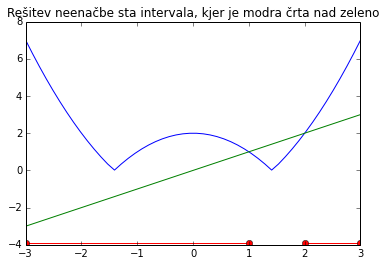

In [78]:
# grafična rešitev
leva_f = sym.lambdify(x,nen2.lhs)
t = np.linspace(-3,3) # zaporedje x-ov, v katerih bomo tabelirali funkcijo
plt.plot(t,[leva_f(ti) for ti in t])
plt.plot(t,sym.lambdify(x,nen2.rhs)(t))
plt.title("Rešitev neenačbe sta intervala, kjer je modra črta nad zeleno")
plt.plot([-3,1],[-3.9,-3.9],'-or')
plt.plot([2,3],[-3.9,-3.9],'-or')
plt.show()

In [54]:
# Prav tako ni težav, če je več absolutnih vrednosti
solve_univariate_inequality(abs(x-1) <= 2*abs(x)-2, x, relational=False)

In [56]:
# težave se pojavijo, če so enačbe gnezdene
solve_univariate_inequality(abs(x-1) <= abs(2*abs(x)-2), x, relational=False)

NotImplementedError: multiple generators [x, Abs(2*x - 2)]
No algorithms are implemented to solve equation x - Abs(2*x - 2) - 1

## Neenačba s trigonometričnimi funkcijami
Poskusimo rešiti še enačbe s trigonometričnimi funkcijami
\begin{equation}
\cos(x)\le\frac{1}{2}
\end{equation}

In [68]:
nen3 = sym.cos(x)<=1/2
nen3

In [69]:
solve_univariate_inequality(nen3,x,relational=False)

Rešitev smo dobili v obliki decimalnih števil. Če želimo rešitev v obliki ulomkov, lahko uporabimo `sympy.S` ali `sympy.Rational`.

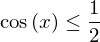

In [70]:
from sympy import S
nen3 = sym.cos(x)<= S(1)/2
nen3

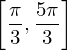

In [71]:
solve_univariate_inequality(nen3,x,relational=False)

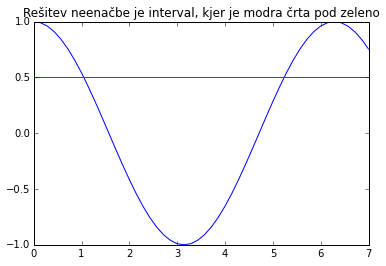

In [76]:
# grafična rešitev
t = np.linspace(0,7)
leva_f = sym.lambdify(x,nen3.lhs)
desna_f = sym.lambdify(x,nen3.rhs)
plt.plot(t,[leva_f(ti) for ti in t])
plt.plot(t,[desna_f(ti) for ti in t])
plt.title("Rešitev neenačbe je interval, kjer je modra črta pod zeleno")
plt.show()

## Naloga

Simbolično in grafično rešite neenačbe:

 $$ x^3-1>x;\quad\left|x+1\right| \le \left|2x-1\right|;\quad \sin(x)<\frac{\sqrt{3}}{2}\text{ na intervalu } [0,2\pi)$$

[<< nazaj: enačbe](01a_enacbe.ipynb) ... [naprej: kompleksna števila >>](01c_kompleksna.ipynb)